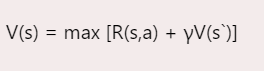

In [3]:
import pandas as pd
import random

def generate_score():
  return random.randint(0, 200)

data = []

# Generate data for 5000 rows
for i in range(5000):
  query = f"Q{i+1}"
  score = generate_score()
  attack = 1 if score > 100 else 0
  data.append({"query": query, "score": score, "attack": attack})

df = pd.DataFrame(data)

df

,query,score,attack
0,Q1,73,0
1,Q2,38,0
2,Q3,128,1
3,Q4,179,1
4,Q5,173,1
...,...,...,...
4995,Q4996,82,0
4996,Q4997,190,1
4997,Q4998,59,0
4998,Q4999,129,1


In [4]:
# saving the dataframe
df.to_csv('file1.csv')

In [1]:
import pandas as pd

df = pd.read_csv('file1.csv')

alpha = 0.90

def rewardget(score):
    if score >= 0 and score <= 19:
        return 50
    elif score >= 20 and score <= 39:
        return 40
    elif score >= 40 and score <= 59:
        return 30
    elif score >= 60 and score <= 79:
        return 20
    elif score >= 80 and score <= 99:
        return 10
    elif score == 100:
        return 0
    elif score >= 101 and score <= 120:
        return -10
    elif score >= 121 and score <= 140:
        return -20
    elif score >= 141 and score <= 160:
        return -30
    elif score >= 161 and score <= 180:
        return -40
    elif score >= 181 and score <= 200:
        return -50

def valuefind(reward, previousValue):
    currentValue = reward + alpha * previousValue
    return currentValue

currentValues = []
previousValue = 0

for i in range(len(df)):
    score = df.loc[i, 'score']
    reward = rewardget(score)
    currentValue = valuefind(reward, previousValue)
    currentValues.append(currentValue)
    previousValue = currentValue

# Append 'currentValues' as a new column to the DataFrame
df['currentValues'] = currentValues

df.head(20)


,Unnamed: 0,query,score,attack,currentValues
0,0,Q1,73,0,20.000000
1,1,Q2,38,0,58.000000
2,2,Q3,128,1,32.200000
3,3,Q4,179,1,-11.020000
4,4,Q5,173,1,-49.918000
5,5,Q6,91,0,-34.926200
6,6,Q7,182,1,-81.433580
7,7,Q8,200,1,-123.290222
8,8,Q9,15,0,-60.961200
9,9,Q10,84,0,-44.865080
